## Import libraries

In [1]:
import pandas as pd
import pickle
from pickle import dump, load
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

## Import data

In [2]:
y_train = pd.read_csv("/workspaces/EDA_5_alfonso_Random_Forest/data/processed/diabetes_y_train.csv")
y_test = pd.read_csv("/workspaces//EDA_5_alfonso_Random_Forest/data/processed/diabetes_y_test.csv")
X_train = pd.read_csv("/workspaces//EDA_5_alfonso_Random_Forest/data/processed/diabetes_X_train.csv")
X_test = pd.read_csv("/workspaces//EDA_5_alfonso_Random_Forest/data/processed/diabetes_X_test.csv")


Creation of a loop to determine the optimal percentage of variables for this specific model.

In [3]:
# Variable that stores a list with all the results of the accuracies
accs = []

# Variable that stores a list with percentages
percents = [1, 0.8, 0.7, 0.6, 0.5]

# Iterate through the percentages to determine the best k
for p in percents:
    selection_model = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)
    ix = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

    # We make a pickle to save all the models
    dump(selection_model, open(f"/workspaces/EDA_5_alfonso_Random_Forest/models/selection_model{p}.pk", "wb"))

    model = RandomForestClassifier(random_state = 24)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)
    
# We establish the best accuracy as the one with the highest value
best_acc = accs.index(max(accs)) 

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

In [4]:
# Print the results
print(f'The best k for selection is {percents[best_acc]}.')
print(f'The best accuracy we get is {round(accs[best_acc],4)}.')
print(accs)

The best k for selection is 0.6.
The best accuracy we get is 0.7532.
[0.7402597402597403, 0.7402597402597403, 0.7402597402597403, 0.7532467532467533, 0.7532467532467533]


## First result

We obtain an accuracy of 0.7532 with a percentage of 60% of the variables according to SelectKBest.

We will try to improve these results with hyperparameter optimization below.

## Optimization of hyperparameters

In [5]:
# Create a dictionary with the hyperparameters that we want to optimize
hyperparameters = {
                    'n_estimators' : [10, 20, 40, 70, 100],
                    'bootstrap' : [True, False],
                    'max_depth': [None, 5, 10, 15, 20],
                    'min_samples_split': [2, 5, 10, None],
                    'min_samples_leaf': [1, 12, 30, 80, None],
                    'max_features': [None, 'sqrt', 'log2'],
                    'random_state': [24]    
}

# Create a variable to store our machine learning model
tree_classifier = RandomForestClassifier(random_state = 24)

# We apply GridSearchCV to the model along with the hyperparameters
grid = GridSearchCV(tree_classifier, hyperparameters, cv=5)
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=24),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 12, 30, 80, None],
                         'min_samples_split': [2, 5, 10, None],
                         'n_estimators': [10, 20, 40, 70, 100],
                         'random_state': [24]})

In [6]:
# Load the 0.6 model and feed it with X_train and y_train
selection_model = pickle.load(open("/workspaces/EDA_5_alfonso_Random_Forest/models/selection_model0.6.pk", "rb"))
selection_model.fit(X_train, y_train)

# Create new train/tests based on our model
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# Feed our optimized model and train it
grid.fit(X_train_sel, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=24),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 12, 30, 80, None],
                         'min_samples_split': [2, 5, 10, None],
                         'n_estimators': [10, 20, 40, 70, 100],
                         'random_state': [24]})

In [8]:
# Store the optimal parameters of our model in a variable
best_model = grid.best_estimator_

# Visualize the optimal parameters
best_model

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=40,
                       random_state=24)

## Optimized Accuracy

In [15]:
# Feed our best model with our best variables
best_model.fit(X_train_sel, y_train)
y_pred = best_model.predict(X_test_sel)

# Obtain result
opt_result = accuracy_score(y_test, y_pred)
print(f'The optimized result is {round(opt_result, 4)}.')

# Claculate the difference between results
default_result = accs[best_acc]
print(f'The optimization has improved the model in {round((opt_result-default_result), 4)} points.')


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The optimized result is 0.7662.
The optimization has improved the model in 0.013 points.


## Optimization Result

The model has been improved in just 0.013 points regarding the default model. The execution of the program was very slow, so we decide to take only a few tests considering this is just a practice. It's not assured that the result is the absolute optimum. Therefore we should run more tests while tuning the hyperparameters.

## Forest Plot

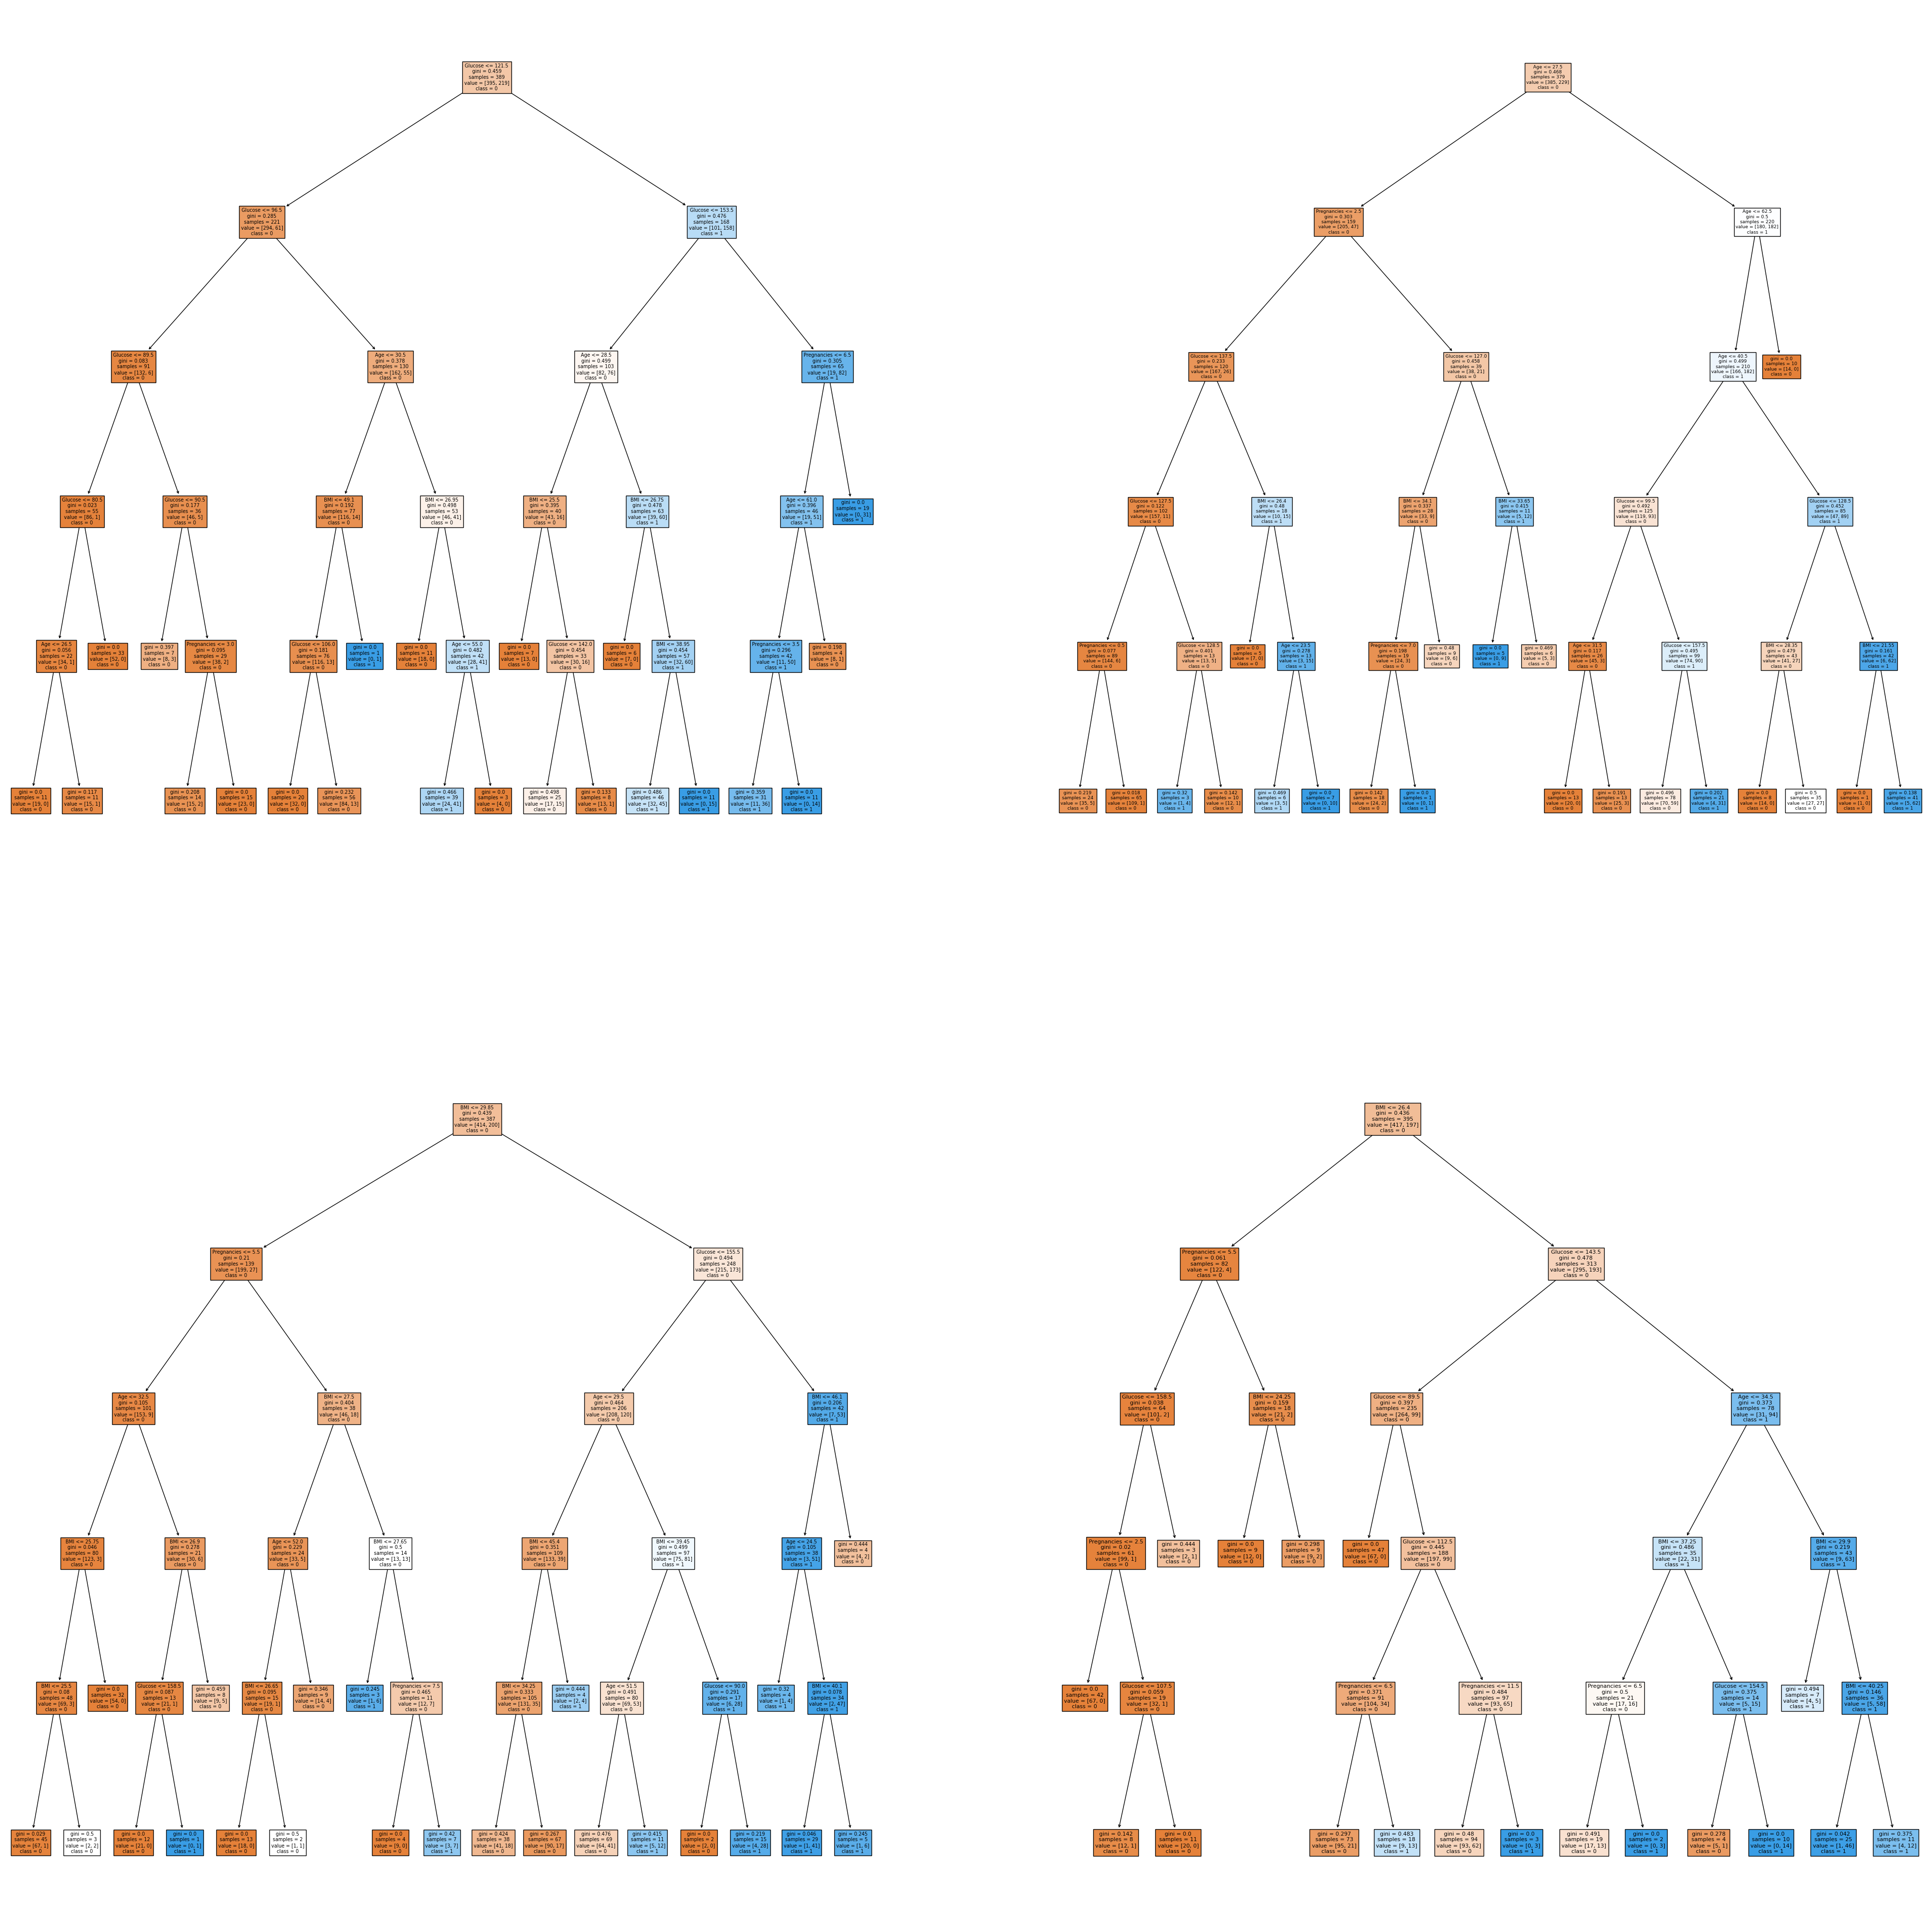

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (50, 50))

# Show the first 4 trees of the 40 generated
tree.plot_tree(best_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2"], filled = True)

# Save the figure as a PNG file in the desired directory
output_file_path = "/workspaces/EDA_5_alfonso_Random_Forest/assets/plot_trees.png"
plt.savefig(output_file_path)


plt.show()

## Conclusion

Upon a thorough examination of both outcomes – one derived from the application of RandomForest with default hyperparameters and the other from its utilization with optimized hyperparameters – a nuanced improvement in accuracy becomes apparent. This observation stems from iterative program executions, during which we systematically adjusted the hyperparameters. Despite the incremental nature of the accuracy enhancement, it signifies a discernible refinement in the model's performance.

In contrast to our preceding project, which involved the training of a Decision Tree model, where improvements were noticeable but relatively constrained, the present initiative with RandomForest and optimized hyperparameters showcases a comparatively more pronounced margin of enhancement. The meticulous tuning of hyperparameters has evidently played a pivotal role in refining the model's predictive capabilities.

In synthesizing these insights, we draw the conclusion that, within the specific context of this case, the adoption of RandomForest with finely tuned hyperparameters emerges as the preeminent approach for addressing a machine learning model. This choice is substantiated by the nuanced yet consistent improvements observed in accuracy, underscoring the efficacy of the optimization process in fine-tuning the model's performance.